In [53]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Inisialisasi Library

In [54]:
#Import Library
import pandas as pd # import pandas module to read the data
import io # import io module to read the data
import numpy as np # import numpy module for numeric computation
import matplotlib.pyplot as plt #import matplotlib.pyplot for graphical plotting
import seaborn as sns #import seaborn of matplotlib for statistical graphic 
import squarify # import squarify for creating treemaps
import datetime as dt #import datetime dor manipulating date and time

In [55]:
# read file
from google.colab import files # import files module to upload data file
uploaded = files.upload() # upload file

df = pd.read_csv(io.BytesIO(uploaded['Customer_Segmentation_Data.csv'])) # read  the dataset
df.head() 

Saving Customer_Segmentation_Data.csv to Customer_Segmentation_Data (1).csv


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.0,United Kingdom


In [56]:
# DATA EXPLORATION

In [57]:
df['Customer ID'] = df['Customer ID'].astype(str) # change Customer ID data type from float64 into string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1044848 non-null  object 
 1   StockCode    1044848 non-null  object 
 2   Description  1040573 non-null  object 
 3   Quantity     1044848 non-null  int64  
 4   InvoiceDate  1044848 non-null  object 
 5   Price        1044848 non-null  float64
 6   Customer ID  1044848 non-null  object 
 7   Country      1044848 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.8+ MB


In [58]:
df.describe().T # statistics descriptive for numeric atribut

,count,mean,std,min,25%,50%,75%,max
Quantity,1044848.0,9.993649,174.218493,-80995.00,1.00,3.0,10.00,80995.0
Price,1044848.0,4.590546,121.704167,-53594.36,1.25,2.1,4.13,38970.0


In [59]:
df['Description'].nunique() #number of unique products

5698

In [60]:
df1 = df[df["Quantity"] > 0] #drop the negative value of the Quantity
a=df1.groupby('Description').agg({'Quantity':'sum'}) # the most ordered products
a.sort_values(by='Quantity',ascending=False) # sort the products by the most ordered

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,106490
WHITE HANGING HEART T-LIGHT HOLDER,94783
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,80301
MEDIUM CERAMIC TOP STORAGE JAR,78033
...,...
EURO FOOTBALL STARS TOP TRUMPS GAME,1
FLOWER SHOP DESIGN MUG,1
VINTAGE METAL CAKE STAND CREAM,1


In [61]:
df1 = df1[df1["Price"] > 0] #drop the negative value of the Price Atribut
df1["TotalPrice"] = df1["Quantity"] * df1["Price"] # create total price atribut
df1.groupby('Country').agg({'TotalPrice':'sum'}).sort_values('TotalPrice',ascending=False).head() #total earn from each country sort by the highest

<ipython-input-61-cb3c93b1d3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalPrice"] = df1["Quantity"] * df1["Price"] # create total price atribut


,TotalPrice
Country,
United Kingdom,1.746627e+07
EIRE,6.591490e+05
Netherlands,5.540397e+05
Germany,4.255784e+05
France,3.506542e+05


In [62]:
### DATA PREPARATION ###

In [63]:
# check percentage of null values
((df1.isnull().sum())/(df.shape[0])*100).sort_values(ascending=False)

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
TotalPrice     0.0
dtype: float64

In [64]:
df.shape #data shape

(1044848, 8)

In [65]:
df1.describe().T # statistic descriptive

,count,mean,std,min,25%,50%,75%,max
Quantity,1019655.0,11.022696,127.741485,1.000,1.00,3.0,11.00,80995.00
Price,1019655.0,4.056875,50.141497,0.001,1.25,2.1,4.13,25111.09
TotalPrice,1019655.0,20.138297,204.536958,0.001,3.90,10.0,17.70,168469.60


In [66]:
### RFM ###

In [67]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France,14.85


In [68]:
# RECENCY

In [69]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate']) # convert string Date time into Python Date time object
max_date = max(df1['InvoiceDate']) # last transaction
df1['Recency'] = max_date - df1['InvoiceDate'] # Calculate difference between the last transaction and the invoice date

In [70]:
# create dataset for atribut Recency
rfm_p = df1.groupby('Customer ID')['Recency'].min()
rfm_p = rfm_p.reset_index()

In [71]:
# Extract number of days
rfm_p['Recency'] = rfm_p['Recency'].dt.days
rfm_p.head()

,Customer ID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [72]:
# Frequency 
rfm_f = df1.groupby('Customer ID')['Invoice'].count() # count the total purchase of each customer, group by dustomer ID
rfm_f = rfm_f.reset_index() # reset index
rfm_f.columns = ['Customer ID', 'Frequency'] # name the column
rfm_f.head()

,Customer ID,Frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [73]:
# Monetary
rfm_m = df1.groupby('Customer ID')['TotalPrice'].sum() # total price per Customer ID
rfm_m = rfm_m.reset_index() # reset index
rfm_m.columns = ['Customer ID', 'Monetary'] # name the column
rfm_m.head()

,Customer ID,Monetary
0,12346.0,77556.46
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


In [74]:
# Merge dataframe 
rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm = pd.merge(rfm, rfm_p, on='Customer ID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,4921.53,222,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [75]:
## RFM SCORE

In [76]:
# Calculating RFM Score based on quantile
# Recency, 3 = Most recent, 1 = least . 
rfm["recency_score"] = pd.qcut(rfm['Recency'], 3, labels=[ 3, 2, 1])

#Frequency, 3 = Most frequent, 1 = rarely
rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 3, labels=[1, 2, 3])

#Monetary, 3 = best, 1 = least
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])
rfm.head(5)

,CustomerID,Monetary,Frequency,Recency,recency_score,frequency_score,monetary_score
0,12346.0,77556.46,34,325,1,2,3
1,12347.0,4921.53,222,1,3,3,3
2,12348.0,2019.40,51,74,2,2,3
3,12349.0,4428.69,175,18,3,3,3
4,12350.0,334.40,17,309,1,1,1


In [77]:
# Concating the RFM quartile values to create RFM Segments
rfm["RFM_Segment"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))
rfm

,CustomerID,Monetary,Frequency,Recency,recency_score,frequency_score,monetary_score,RFM_Segment
0,12346.0,77556.46,34,325,1,2,3,123
1,12347.0,4921.53,222,1,3,3,3,333
2,12348.0,2019.40,51,74,2,2,3,223
3,12349.0,4428.69,175,18,3,3,3,333
4,12350.0,334.40,17,309,1,1,1,111
...,...,...,...,...,...,...,...,...
5874,18284.0,461.68,28,431,1,1,1,111
5875,18285.0,427.00,12,660,1,1,1,111
5876,18286.0,1296.43,67,476,1,2,2,122
5877,18287.0,4182.99,155,42,2,3,3,233


In [78]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
print(rfm['RFM_Score'].head())

27
0    6
1    9
2    7
3    9
4    3
Name: RFM_Score, dtype: int64


In [79]:
# Define rfm_segment function
def rfm_segment(df1):
    if df1['RFM_Score'] >= 9:
        return 'Best Customers'
    elif ((df1['RFM_Score'] >= 8) and (df1['RFM_Score'] < 9)):
        return 'Loyal/Commited'
    elif ((df1['RFM_Score'] >= 7) and (df1['RFM_Score'] < 8)):
        return 'Potential'
    elif ((df1['RFM_Score'] >= 6) and (df1['RFM_Score'] < 7)):
        return 'Promising'
    elif ((df1['RFM_Score'] >= 5) and (df1['RFM_Score'] < 6)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_segment
rfm['RFM_segment'] = rfm.apply(rfm_segment, axis=1)
# Printing the header with top 15 rows 
rfm.head(15)

,CustomerID,Monetary,Frequency,Recency,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,RFM_segment
0,12346.0,77556.46,34,325,1,2,3,123,6,Promising
1,12347.0,4921.53,222,1,3,3,3,333,9,Best Customers
2,12348.0,2019.40,51,74,2,2,3,223,7,Potential
3,12349.0,4428.69,175,18,3,3,3,333,9,Best Customers
4,12350.0,334.40,17,309,1,1,1,111,3,Demands Activation
5,12351.0,300.93,21,374,1,1,1,111,3,Demands Activation
6,12352.0,2849.84,103,35,3,3,3,333,9,Best Customers
7,12353.0,406.76,24,203,2,1,1,211,4,Demands Activation
8,12354.0,1079.40,58,231,2,2,2,222,6,Promising
9,12355.0,947.61,35,213,2,2,2,222,6,Promising


In [80]:
# Calculate average values for each RFM_segment, and return a size of each segment 
rfm_segment_agg = rfm.groupby('RFM_segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_segment_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_segment                                        
Best Customers        14.2     692.6  14209.8   969
Demands Activation   400.9      17.9    278.6  1716
Loyal/Commited        67.1     203.5   3590.8   771
Potential            103.6     104.0   2349.3   747
Promising            162.3      62.0   1343.9   832
Requires Attention   250.8      37.4    764.5   844


In [81]:
# check that the customers have been assigned to the correct segment by counting the number with each segment
rfm.groupby('RFM_segment').agg(
    customers=('CustomerID', 'count'),
    min_rfm=('RFM_Segment', 'min'),
    max_rfm=('RFM_Segment', 'max'),
).reset_index().sort_values(by='min_rfm')

,RFM_segment,customers,min_rfm,max_rfm
1,Demands Activation,1716,111,211
5,Requires Attention,844,113,311
4,Promising,832,123,321
3,Potential,747,133,331
2,Loyal/Commited,771,233,332
0,Best Customers,969,333,333


In [82]:
# Check the minimum and maximum value of Recency, Frequency, Monetary in each segments 
rfm.groupby('RFM_segment').agg(
    min_recency=('Recency', 'min'),
    max_recency=('Recency', 'max'),
    min_frequency=('Frequency', 'min'),
    max_frequency=('Frequency', 'max'),
    min_monetary=('Monetary', 'min'),
    max_monetary=('Monetary', 'max'),
).reset_index().sort_values(by='min_recency')

,RFM_segment,min_recency,max_recency,min_frequency,max_frequency,min_monetary,max_monetary
0,Best Customers,0,40,97,228610,1602.13,3102564.31
2,Loyal/Commited,0,263,30,1343,470.73,34281.18
3,Potential,0,623,1,2499,302.10,168472.50
4,Promising,0,679,1,349,96.11,77556.46
5,Requires Attention,0,737,1,146,20.80,13916.34
1,Demands Activation,41,738,1,93,2.95,1542.09


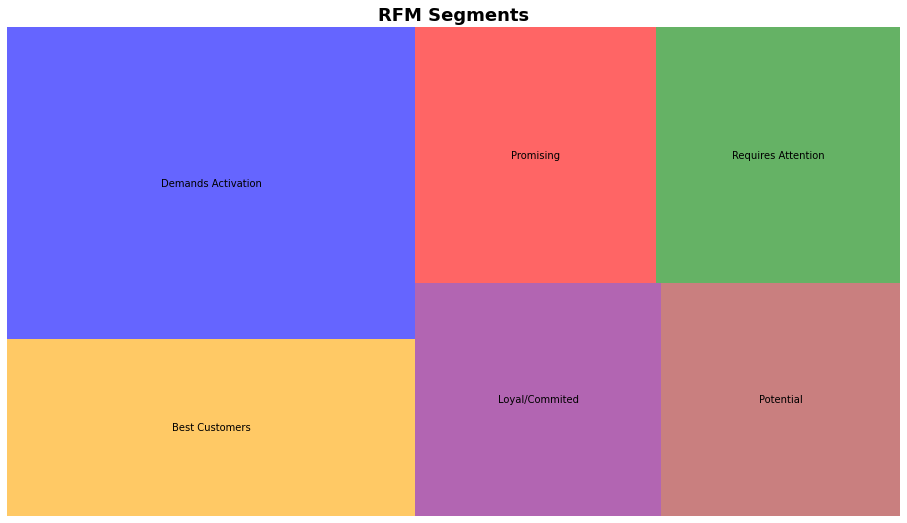

In [83]:
# SQUARIFY PLOT
rfm_segment_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count'] # create atribut name for the table
#Create our plot and resize it.
fig = plt.gcf() # get the current figure
ax = fig.add_subplot() # add subplot
fig.set_size_inches(16,9) #figure size
colors = ["orange", "blue", "purple", "brown", "red", "green"] # color per segments
squarify.plot(sizes=rfm_segment_agg['Count'], 
              label=['Best Customers',
                     'Demands Activation',
                     'Loyal/Commited',
                     'Potential', 
                     'Promising',
                     'Requires Attention'
                     ], alpha=.6, color = colors) #squarify plot
plt.title("RFM Segments",fontsize=18,fontweight="bold") #plot title
plt.axis('off') #do not show axis
plt.show() #show plot

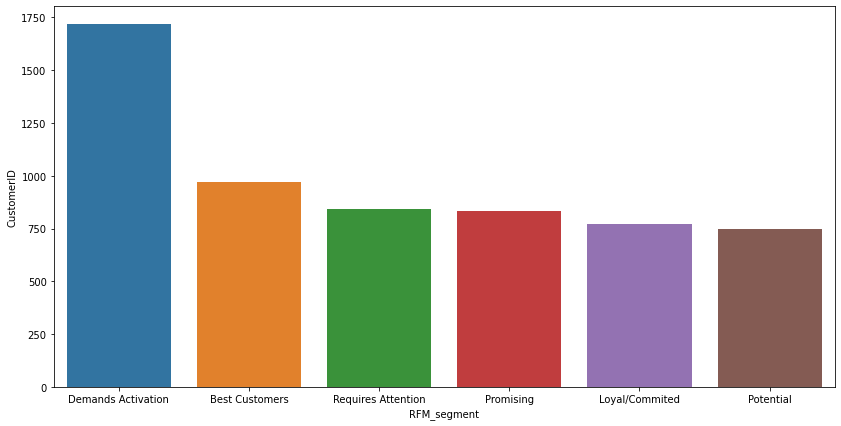

In [84]:
# create a table of the number of customer each segment
sq1 = rfm.groupby('RFM_segment')['CustomerID'].nunique().sort_values(ascending=False).reset_index() 
# create the bar plot 
plt.figure(figsize=(14,7))
sns.barplot(data=sq1, x='RFM_segment', y='CustomerID')

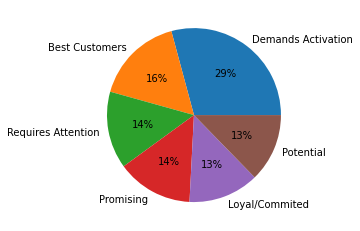

In [85]:
plt.pie(rfm.RFM_segment.value_counts(),
        labels=rfm.RFM_segment.value_counts().index,
        autopct='%.0f%%') # Create Pie Plot of the percentage of customer distribution
plt.show()